In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Марья Александровна', 'Ненила Петровна', 'Журиленко', 'Барон Кергоф', 'Шемуа', 'Шулькин'],
  ['Марья Александровна', 'Ненила Петровна', 'Журиленко', 'Барон Кергоф', 'Шемуа', 'Шулькин', 'Сосипатов'],
  ['Марья Александровна', 'Ненила Петровна', 'Журиленко', 'Барон Кергоф', 'Шемуа', 'Сосипатов', 'Лакей'],
  ['Марья Александровна', 'Ненила Петровна', 'Журиленко', 'Барон Кергоф', 'Шулькин', 'Шемуа', 'Сосипатов', 'Сер Тонель', 'Демьянский'],
  ['Барон Кергоф'],
  ['Марья Александровна', 'Барон Кергоф'],
  ['Марья Александровна']],
 [['Сосипатов', 'Говорков'],
  ['Сосипатов', 'Лакей'],
  ['Сосипатов', 'Прокудин'],
  ['Сосипатов', 'Прокудин', 'Живодеров'],
  ['Сосипатов', 'Прокудин'],
  ['Сосипатов', 'Лакей', 'Ненила Петровна', 'Шемуа'],
  ['Сосипатов', 'Ненила Петровна'],
  ['Сосипатов', 'Ненила Петровна', 'Барон Кергоф'],
  ['Сосипатов', 'Ненила Петровна', 'Барон Кергоф', 'Марья Александровна'],
  ['Сосипатов', 'Марья Александровна', 'Ненила Петровна']],
 [['Барон Кергоф', 'Баронесса'],
  ['Барон Кергоф', 'Баронесса', 'Шулькин'],
  ['Барон Кергоф', 'Лакей'],
  ['Барон Кергоф', 'Персиков', 'Лакей'],
  ['Марья Александровна', 'Барон Кергоф']],
 [['Говорков', 'Ненила Петровна', 'Прокудин', 'Шемуа'],
  ['Говорков', 'Ненила Петровна', 'Прокудин', 'Шемуа', 'Марья Александровна', 'Барон Кергоф'],
  ['Говорков', 'Ненила Петровна', 'Прокудин', 'Шемуа', 'Марья Александровна', 'Барон Кергоф', 'Сосипатов', 'Лакей'],
  ['Говорков', 'Ненила Петровна', 'Прокудин', 'Шемуа', 'Марья Александровна', 'Барон Кергоф', 'Сосипатов', 'Лакей', 'Судебный следователь', 'Частный пристав', 'Квартальный'],
  ['Барон Кергоф'],
  ['Барон Кергоф', 'Марья Александровна']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,III.1,III.2,III.3,III.4,III.5,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6
Барон Кергоф,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1
Баронесса,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
Говорков,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
Демьянский,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Живодеров,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Журиленко,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Квартальный,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Лакей,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0
Марья Александровна,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,1
Ненила Петровна,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,пьеса
Барон Кергоф,0,0.11,,0,0.19
Баронесса,,,0,,0.04
Говорков,,0,,0,0.11
Демьянский,0.17,,,,0.04
Живодеров,,0.11,,,0.04
Журиленко,0,,,,0.00
Квартальный,,,,0.2,0.04
Лакей,0.17,0.33,0.25,0.2,0.33
Марья Александровна,0.17,0,0,0.4,0.33
Ненила Петровна,0,0,,0,0.15


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.21


,1,2,3,4,5,6,7,8,9,10,действия
1,0.33,0.39,0.39,0.50,0.06,0.11,0.06,,,,0.26
2,0.11,0.11,0.11,0.17,0.11,0.22,0.11,0.17,0.22,0.17,0.15
3,0.11,0.17,0.11,0.17,0.11,,,,,,0.13
4,0.22,0.33,0.44,0.61,0.06,0.11,,,,,0.30


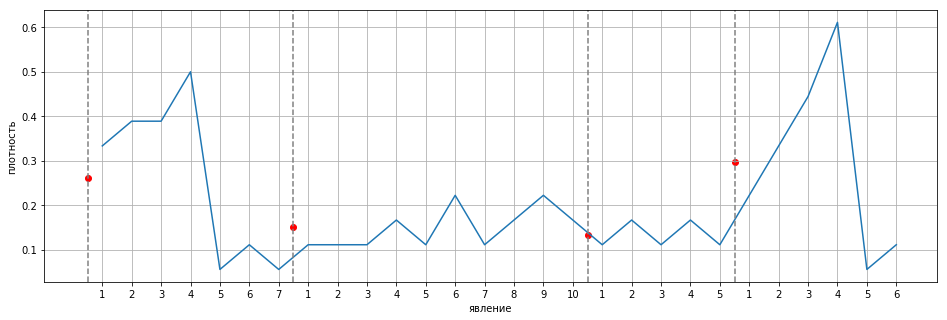

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

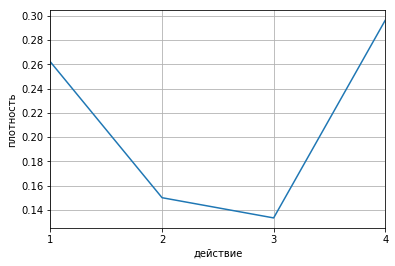

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1    2    3     4  пьеса
Барон Кергоф         Баронесса                        0.6         0.57
                     Говорков                    0.3        0.5   0.61
                     Демьянский            0.71                   0.61
                     Живодеров                   0.3              0.68
                     Журиленко             0.29                   0.50
                     Квартальный                           0.67   0.61
                     Лакей                 0.71  0.4  0.6   0.5   0.54
                     Марья Александровна   0.29  0.2  0.8  0.17   0.32
                     Ненила Петровна       0.29  0.3        0.5   0.46
                     Персиков                         0.8         0.61
                     Прокудин                    0.5        0.5   0.68
                     Сер Тонель            0.71                   0.61
                     Сосипатов             0.43  0.8        0.5   0.68
                     Судебный следователь                  0.67   0.61
                     Частный пристав                       0.67   0.61
                     Шемуа                 0.29  0.3        0.5   0.46
                     Шулькин               0.43       0.8         0.50
Баронесса            Барон Кергоф                     0.6         0.57
                     Говорков                                     0.25
                     Демьянский                                   0.11
                     Живодеров                                    0.11
                     Журиленко                                    0.21
                     Квартальный                                  0.11
                     Лакей                            0.8         0.32
                     Марья Александровна              0.6         0.54
                     Ненила Петровна                              0.54
                     Персиков                         0.6         0.11
                     Прокудин                                     0.32
                     Сер Тонель                                   0.11
                     Сосипатов                                    0.61
                     Судебный следователь                         0.11
                     Частный пристав                              0.11
                     Шемуа                                        0.39
                     Шулькин                          0.2         0.14
Говорков             Барон Кергоф                0.3        0.5   0.61
                     Баронесса                                    0.25
                     Демьянский                                   0.21
                     Живодеров                   0.2              0.21
                     Журиленко                                    0.32
                     Квартальный                            0.5   0.14
                     Лакей                       0.3       0.33   0.29
                     Марья Александровна         0.3       0.33   0.43
                     Ненила Петровна             0.6          0   0.36
                     Персиков                                     0.21
                     Прокудин                    0.4          0   0.14
                     Сер Тонель                                   0.21
                     Сосипатов                   0.9       0.33   0.50
                     Судебный следователь                   0.5   0.14
                     Частный пристав                        0.5   0.14
                     Шемуа                       0.2          0   0.21
                     Шулькин                                      0.32
Демьянский           Барон Кергоф          0.71                   0.61
                     Баронесса                                    0.11
                     Говорков                                     0.21
                     Живодеров                                    0.07
                     Журиленко             0.43                   0.11

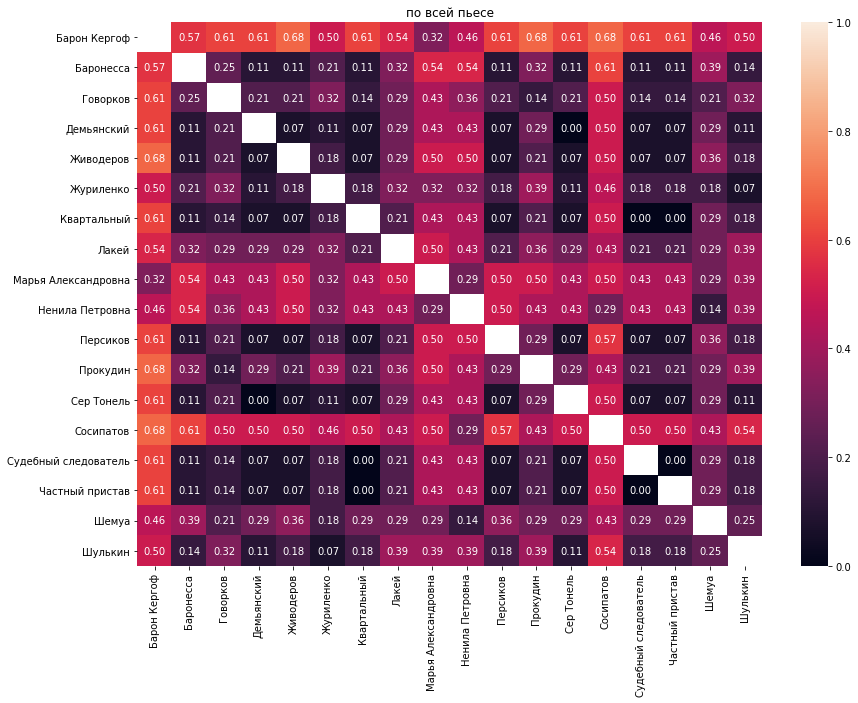

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

Демьянский = Сер Тонель
Квартальный = Судебный следователь
Квартальный = Частный пристав
Судебный следователь = Частный пристав


## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

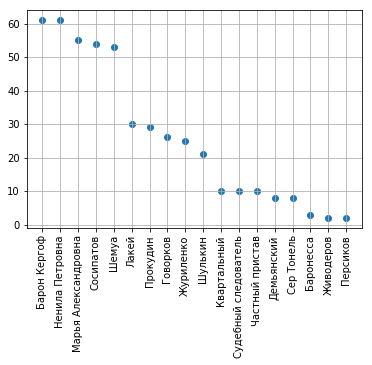

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Барон Кергоф,Ненила Петровна,Марья Александровна,Сосипатов,Шемуа,Лакей,Прокудин,Говорков,Журиленко,Шулькин,Квартальный,Судебный следователь,Частный пристав,Демьянский,Сер Тонель,Баронесса,Живодеров,Персиков
ранг,61,61,55,54,53,30,29,26,25,21,10,10,10,8,8,3,2,2


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,пьеса
Барон Кергоф,0.86,0.2,1,0.83,0.64
Сосипатов,0.43,1,,0.33,0.54
Марья Александровна,0.86,0.2,0.2,0.67,0.46
Ненила Петровна,0.57,0.5,,0.67,0.46
Шемуа,0.57,0.1,,0.67,0.32
Лакей,0.14,0.2,0.4,0.33,0.25
Прокудин,,0.3,,0.67,0.25
Говорков,,0.1,,0.67,0.18
Журиленко,0.57,,,,0.14
Шулькин,0.43,,0.2,,0.14


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,Барон Кергоф,Баронесса,Говорков,Демьянский,Живодеров,Журиленко,Квартальный,Лакей,Марья Александровна,Ненила Петровна,Персиков,Прокудин,Сер Тонель,Сосипатов,Судебный следователь,Частный пристав,Шемуа,Шулькин
Барон Кергоф,,,,1,,1,,1,0.83,1,,,1,1,,,1,1
Баронесса,0,,,0,,0,,0,0,0,,,0,0,,,0,0
Говорков,0,,,0,,0,,0,0,0,,,0,0,,,0,0
Демьянский,0.17,,,,,0.25,,0,0.17,0.25,,,1,0.33,,,0.25,0.33
Живодеров,0,,,0,,0,,0,0,0,,,0,0,,,0,0
Журиленко,0.67,,,1,,,,1,0.67,1,,,1,1,,,1,1
Квартальный,0,,,0,,0,,0,0,0,,,0,0,,,0,0
Лакей,0.17,,,0,,0.25,,,0.17,0.25,,,0,0.33,,,0.25,0
Марья Александровна,0.83,,,1,,1,,1,,1,,,1,1,,,1,1
Ненила Петровна,0.67,,,1,,1,,1,0.67,,,,1,1,,,1,1


Действие 2


,Барон Кергоф,Баронесса,Говорков,Демьянский,Живодеров,Журиленко,Квартальный,Лакей,Марья Александровна,Ненила Петровна,Персиков,Прокудин,Сер Тонель,Сосипатов,Судебный следователь,Частный пристав,Шемуа,Шулькин
Барон Кергоф,,,0,,0,,,0,0.5,0.4,,0,,0.2,,,0,
Баронесса,0,,0,,0,,,0,0,0,,0,,0,,,0,
Говорков,0,,,,0,,,0,0,0,,0,,0.1,,,0,
Демьянский,0,,0,,0,,,0,0,0,,0,,0,,,0,
Живодеров,0,,0,,,,,0,0,0,,0.33,,0.1,,,0,
Журиленко,0,,0,,0,,,0,0,0,,0,,0,,,0,
Квартальный,0,,0,,0,,,0,0,0,,0,,0,,,0,
Лакей,0,,0,,0,,,,0,0.2,,0,,0.2,,,1,
Марья Александровна,0.5,,0,,0,,,0,,0.4,,0,,0.2,,,0,
Ненила Петровна,1,,0,,0,,,0.5,1,,,0,,0.5,,,1,


Действие 3


,Барон Кергоф,Баронесса,Говорков,Демьянский,Живодеров,Журиленко,Квартальный,Лакей,Марья Александровна,Ненила Петровна,Персиков,Прокудин,Сер Тонель,Сосипатов,Судебный следователь,Частный пристав,Шемуа,Шулькин
Барон Кергоф,,1,,,,,,1,1,,1,,,,,,,1
Баронесса,0.4,,,,,,,0,0,,0,,,,,,,1
Говорков,0,0,,,,,,0,0,,0,,,,,,,0
Демьянский,0,0,,,,,,0,0,,0,,,,,,,0
Живодеров,0,0,,,,,,0,0,,0,,,,,,,0
Журиленко,0,0,,,,,,0,0,,0,,,,,,,0
Квартальный,0,0,,,,,,0,0,,0,,,,,,,0
Лакей,0.4,0,,,,,,,0,,1,,,,,,,0
Марья Александровна,0.2,0,,,,,,0,,,0,,,,,,,0
Ненила Петровна,0,0,,,,,,0,0,,0,,,,,,,0


Действие 4


,Барон Кергоф,Баронесса,Говорков,Демьянский,Живодеров,Журиленко,Квартальный,Лакей,Марья Александровна,Ненила Петровна,Персиков,Прокудин,Сер Тонель,Сосипатов,Судебный следователь,Частный пристав,Шемуа,Шулькин
Барон Кергоф,,,0.75,,,,1,1,1,0.75,,0.75,,1,1,1,0.75,
Баронесса,0,,0,,,,0,0,0,0,,0,,0,0,0,0,
Говорков,0.6,,,,,,1,1,0.75,1,,1,,1,1,1,1,
Демьянский,0,,0,,,,0,0,0,0,,0,,0,0,0,0,
Живодеров,0,,0,,,,0,0,0,0,,0,,0,0,0,0,
Журиленко,0,,0,,,,0,0,0,0,,0,,0,0,0,0,
Квартальный,0.2,,0.25,,,,,0.5,0.25,0.25,,0.25,,0.5,1,1,0.25,
Лакей,0.4,,0.5,,,,1,,0.5,0.5,,0.5,,1,1,1,0.5,
Марья Александровна,0.8,,0.75,,,,1,1,,0.75,,0.75,,1,1,1,0.75,
Ненила Петровна,0.6,,1,,,,1,1,0.75,,,1,,1,1,1,1,


По всей пьесе


,Барон Кергоф,Баронесса,Говорков,Демьянский,Живодеров,Журиленко,Квартальный,Лакей,Марья Александровна,Ненила Петровна,Персиков,Прокудин,Сер Тонель,Сосипатов,Судебный следователь,Частный пристав,Шемуа,Шулькин
Барон Кергоф,,1,0.6,1,0,1,1,0.71,0.85,0.69,1,0.43,1,0.47,1,1,0.78,1
Баронесса,0.11,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25
Говорков,0.17,0,,0,0,0,1,0.29,0.23,0.31,0,0.57,0,0.2,1,1,0.44,0
Демьянский,0.06,0,0,,0,0.25,0,0,0.08,0.08,0,0,1,0.07,0,0,0.11,0.25
Живодеров,0,0,0,0,,0,0,0,0,0,0,0.14,0,0.07,0,0,0,0
Журиленко,0.22,0,0,1,0,,0,0.14,0.31,0.31,0,0,1,0.2,0,0,0.44,0.75
Квартальный,0.06,0,0.2,0,0,0,,0.14,0.08,0.08,0,0.14,0,0.07,1,1,0.11,0
Лакей,0.28,0,0.4,0,0,0.25,1,,0.23,0.31,1,0.29,0,0.33,1,1,0.44,0
Марья Александровна,0.61,0,0.6,1,0,1,1,0.43,,0.69,0,0.43,1,0.47,1,1,0.78,0.75
Ненила Петровна,0.5,0,0.8,1,0,1,1,0.57,0.69,,0,0.57,1,0.67,1,1,1,0.75


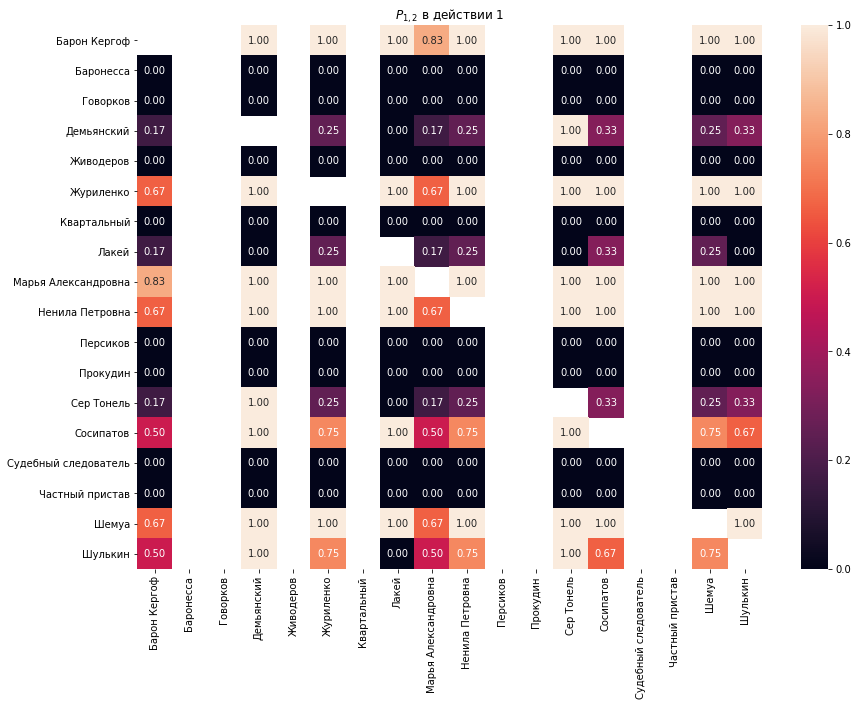

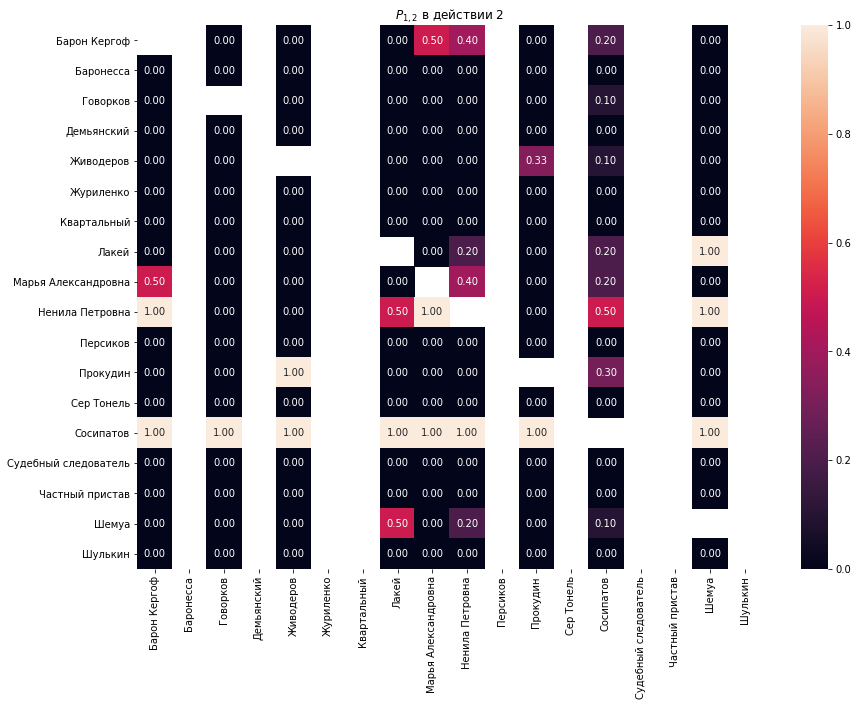

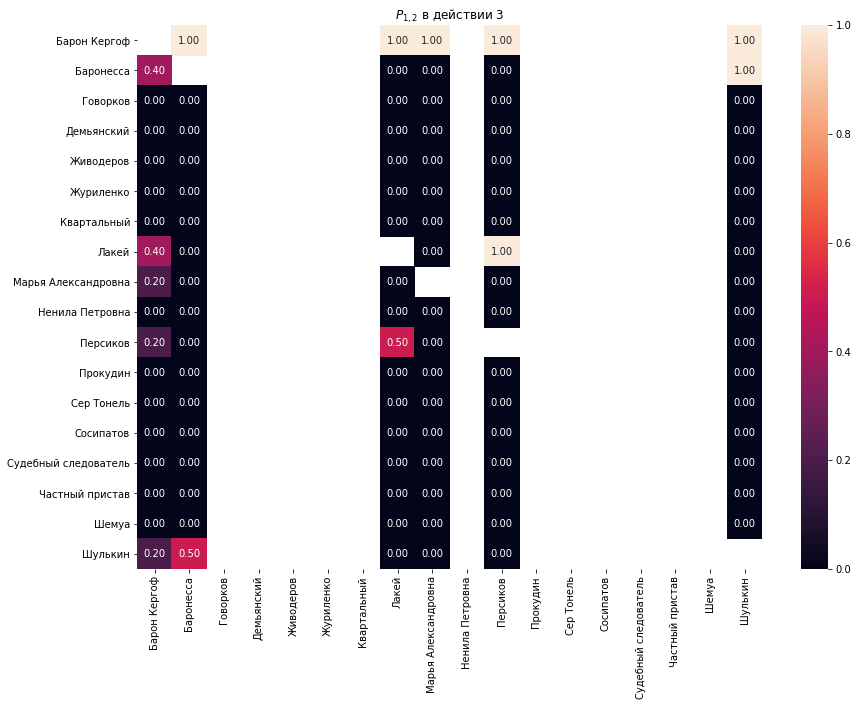

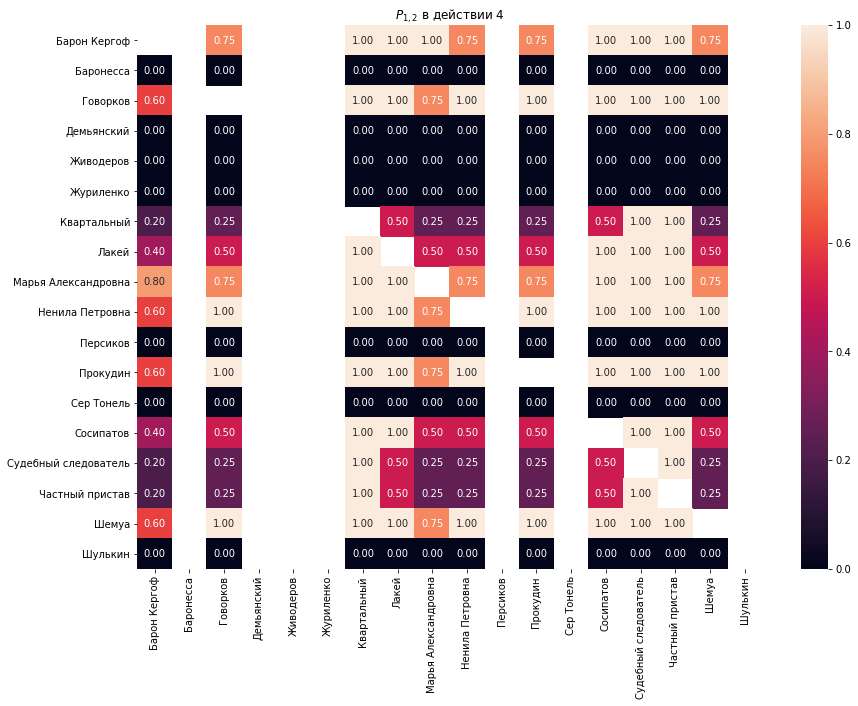

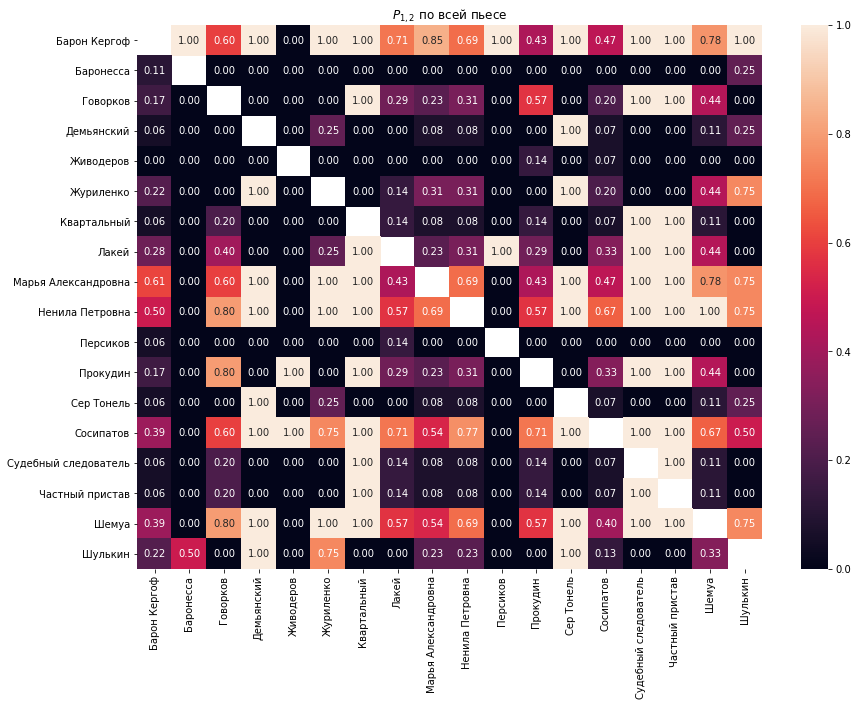

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

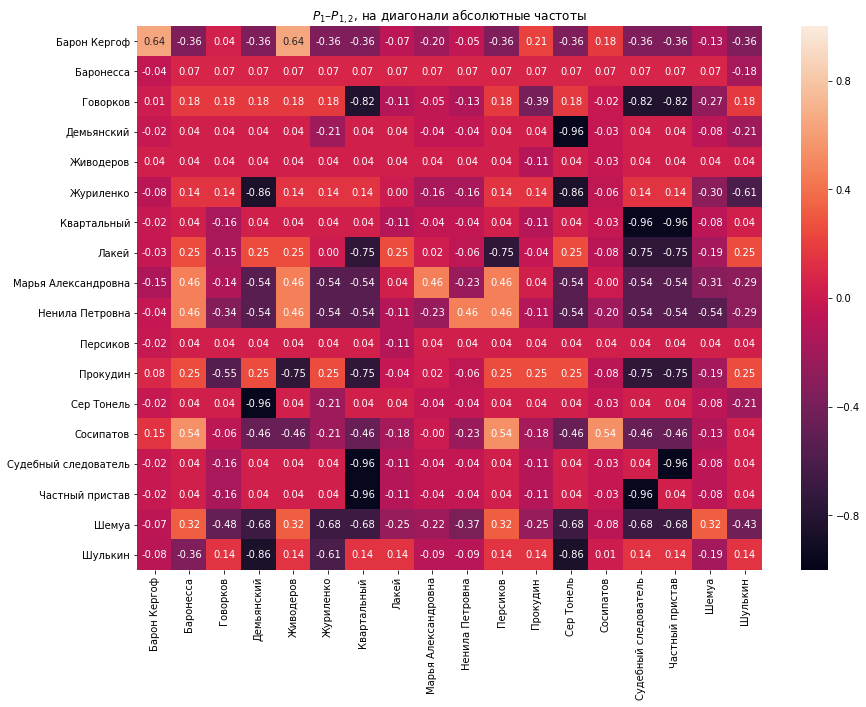

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");